# Github: <a href=https://github.com/dimonko1>@dimonko</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import QuantLib as ql
sns.set_theme(style='darkgrid')

## <font color=7E87FC>Frequently Asked Questions in Quantitative Finance</font> – some shortcuts by Paul Wilmott.
<hr>

## <font color=7E87FC>The Most Popular Probability Distributions and Their Uses in Finance</font>:
#### The * sign will denote DISCRETE distributions further.
<hr style="border-style: dotted" />

### <font color=7E87FC>Normal/Gaussian</font> ($X\sim \text{N}(\mu, \sigma^2)$):
#### Unbounded below and above, symmetrical about its mean. Its PDF:
#### $$f_X(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
#### Pretty common due to the <font color=7E87FC>Central Limit Theorem</font>.

In [ ]:
mu = 0
sigma = 1
X = np.random.normal(mu, sigma, size=10000)
fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
fig.suptitle('Normal distribution', fontsize=20)
plt.tight_layout()
ax[0].plot(X, c='k', lw=.5)
ax[0].margins(x=0)
ax[1].text(0.75*max(X), 0.2, '$\mu=0$\n$\sigma=1$', size=20)
ax[1].axvline(mu, ls='--', lw=.9, c='k')
sns.kdeplot(X, ax=ax[1], multiple='stack', color='green', alpha=.5)
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Lognormal</font> ($X\sim\text{LogN}(\mu, \sigma^2)$):
#### Bounded below, unbounded above. Lognormality of prices follows from the assumption of normally distributed returns.
#### PDF:
#### $$f_X(x) = \frac{1}{\sigma x\sqrt{2\pi}}\exp{-\frac{(\ln(x)-\mu)^2}{2\sigma^2}}, x≥0$$
#### $$\mathbb{E}[X] = e^{\mu+\frac{1}{2}\sigma^2}$$
#### $$\mathbb{Var}[X] = e^{2\mu+\sigma^2}(e^{\sigma^2}-1)$$

In [ ]:
mu = .4
sigma = .3
X_log = np.random.lognormal(mu, sigma, size=100000)
fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
fig.suptitle('Lognormal distribution', fontsize=20)
plt.tight_layout()
ax[0].plot(X_log, c='k', lw=.5)
ax[1].set_xlim(right=max(X_log))
ax[0].margins(x=0)
ax[1].text(0.75*max(X_log), 0.5, '$\mu = 0.4$\n$\sigma = 0.3$', size=20)
ax[1].axvline(mu, ls='--', lw=.9, c='k')
sns.kdeplot(X_log, ax=ax[1], multiple='stack', color='red', alpha=.5)
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Poisson *</font> ($X\sim \text{P}(\lambda)$):
#### R.v. takes non-negative integral values only. Parameters: 
#### – $k$ – number of outcomes;
#### – $\lambda > 0$ – average number of events of interest for us.
#### Used to model credit risk etc.
#### PDF:
#### $$e^{-\lambda}\frac{\lambda^k}{k!}$$ $$\mathbb{E}[X] = \mathbb{Var}[X]= \lambda$$
#### Probability that the store would sell $5$ apples on one given day, given that the average number of apples sold is $3$:

In [ ]:
sp.poisson.pmf(k=5, mu=3)

### Probability that the store would see $5$ OR LESS apples on one given day (MORE than $5$ is $1-$ this prob.):

In [ ]:
sp.poisson.cdf(k=5, mu=3)

In [ ]:
x = sp.poisson.rvs(mu=2, size=10000)
fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
fig.suptitle('Poisson distribution', fontsize=20)
ax[0].plot(x, lw=.5)
ax[1].hist(x, density=True, edgecolor='black')
ax[1].text(0.8*max(x), 0.2, '$\lambda = 2$', size=20)
plt.tight_layout()
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Chi square</font> ($X\sim \chi^2 (a,v)$):
#### Bounded below and unbounded above. Parameters:
#### – $a≥0$ – the location;
#### – $v \in\mathbb{Z}$ – the degrees of freedom:
#### PDF:
#### $$\frac{e^{-(x+a)/2}}{2^{v/2}} \sum_{i=0}^{\infty}\frac{x^{i-1+v/2}a^i}{2^{2i}j!\Gamma(i+v/2)}, x≥0$$
#### $$\mathbb{E}[X] = v+a$$ $$\mathbb{Var}[X]=2(v+2a)$$
#### The chi-square distribution comes from adding up the squares of $v$ normally distributed r.vs. The chi-square distribution with $v=1$ is the distribution of the hedging error from an option that is hedged only distretly;

In [ ]:
x = np.linspace(0,4,100)
fig, ax = plt.subplots(figsize=(12,5), dpi=200)
for i in range(3,6):
    chi_2 = sp.chi2.pdf(x, df=i)
    ax.plot(chi_2, alpha=.5, lw=1.5, label='df = {}'.format(i))
    ax.fill_between(np.linspace(0,100,100), 0, chi_2, 
                alpha=.3)
ax.legend(fontsize=13)
ax.set_title('Chi-square distribution', fontsize=20)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0, right=100)
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Gumbel </font>:
#### Unbounded above and below. Parameters:
#### – $a$ – location;
#### – $b>0$ – scale.
#### PDF:
#### $$\frac{1}{b}e^{\frac{a-x}{b}}e^{-e^{\frac{a-x}{b}}}$$
#### $$\mathbb{E}[X] = a+\gamma b, \text{where }\gamma \text{ is Euler's constant, 0.577216}\ldots$$ $$\mathbb{Var}[X]=\frac{1}{6}\pi^2b^2$$
#### Useful for modelling extreme values, representing the distribution of the maximum value out of a large number of r.vs. drawn from an unbounded distribution.

In [ ]:
mu = -1
sigma = 1
X = np.random.gumbel(mu, sigma, size=10000)
fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
fig.suptitle('Gumbel distribution', fontsize=20)
plt.tight_layout()
ax[0].plot(X, c='k', lw=.5)
ax[0].margins(x=0)
ax[1].set_xlim(left=-4, right=4)
ax[1].text(0.2*max(X), 0.2, '$\mu=-1$\n$\sigma=1$', size=20)
ax[1].axvline(0, ls='--', lw=.9, c='k')
sns.kdeplot(X, ax=ax[1], multiple='stack', color='darkblue', alpha=.5)
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Weibull</font>:
#### Bounded below and unbounded above. Parameters:
#### – $a$ – location;
#### – $b > 0$ – scale;
#### – $c > 0$ – shape.
#### PDF:
#### $$\frac{c}{b}\begin{pmatrix}\frac{x-a}{b}\end{pmatrix}^{c-1}\exp\begin{pmatrix}-\begin{pmatrix}\frac{x-a}{b}\end{pmatrix}^c\end{pmatrix}, x>a$$
#### Also useful for modelling extreme values, representing the distribution of the maximum value out of a large number of random variables drawn from a bounded distribution.

In [ ]:
a = 1 # shape
X = np.random.weibull(a, 1000)

fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
fig.suptitle('Weibull distribution', fontsize=20)
plt.tight_layout()
ax[0].plot(X, c='k', lw=.5)
sns.kdeplot(X, ax=ax[1], multiple='stack', color='purple', alpha=.5)
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Student's t</font>:
#### Unbounded above and belove. Parameters:
#### – $a$ – location;
#### – $b>0$ – scale;
#### – $c>0$ – degrees of freedom.
#### PDF:
#### $$\frac{\Gamma(\frac{c+1}{2})}{b\sqrt{\pi c}\Gamma(\frac{c}{2})} \begin{pmatrix} 1+\frac{(\frac{x-a}{b})^2}{c}\end{pmatrix}^{-\frac{c+1}{2}}$$ $$\mathbb{E}[X] = a$$ $$\mathbb{Var}[X]=(\frac{c}{c-2})b^2$$
#### $n$-th moment only exists if $c>n$.

In [ ]:
x = np.linspace(0,1,100)
fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
for i in range(2,6):
    X = sp.t.rvs(df=i, size=1000)
    ax[0].plot(X, lw=.9)
    sns.kdeplot(X, alpha=.5, ax=ax[1], label='df = {}'.format(i))
ax[1].legend(fontsize=13)
ax[1].set_xlim(-4,4)
plt.suptitle("Student's t distribution", fontsize=20)
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Pareto</font>:
#### Bounded below, unbounded above. Parameters:
#### – $a>0$ – scale;
#### – $b>0$ – shape.
#### PDF:
#### $$\frac{ba^b}{x^{b+1}}, x>a$$
#### $$\mathbb{E}[X] = \frac{ab}{b-1}$$ $$\mathbb{Var}[X] = \frac{a^2b}{(b-2)(b-1)^2}$$
#### $n$-th moment only exists if $b>n$. Used to describe the distribution of wealth – classical power-law distribution.


In [ ]:
X = sp.pareto.rvs(b=3, size=1000)
fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
fig.suptitle('Pareto distribution', fontsize=20)
plt.tight_layout()
ax[0].plot(X, c='k', lw=.5)
ax[1].set_xlim(1,3)
sns.kdeplot(X, ax=ax[1], multiple='stack', color='orange', alpha=.5)
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Uniform</font>:
#### Bounded below and above. Parameters:
#### – $a,b$ – location.
#### PDF:
#### $$\frac{1}{b-a}, a<x<b$$ $$\mathbb{E}[X]=\frac{a+b}{2}$$ $$\mathbb{Var}[X]=\frac{(b-a)^2}{12}$$

In [ ]:
X = np.random.uniform(1,2,size=1000)
fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
fig.suptitle('Uniform distribution', fontsize=20)
plt.tight_layout()
ax[0].plot(X, c='k', lw=.5)
sns.histplot(X, stat='probability', bins=5, ax=ax[1])
ax[1].set_xlim(0,3)
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Inverse normal</font>:
#### Bounded below, unbounded above. Parameters are the same as in normal distribution. PDF:
#### $$\sqrt{\frac{b}{2\pi x^3}}e^{-\frac{b}{2x}(\frac{x-a}{a})^2}, x≥0$$ $$\mathbb{E}[X] = a$$ $$\mathbb{Var}[X] = \frac{a^3}{b}$$
#### It models the time taken by a Brownian motion to cover a certain distance.
<center><img src=https://sun9-20.userapi.com/impg/SaN9r2cFBodTr7VbedbVPRqrh5LXJ0Hku-I6Fw/lpV-MQ8S3Hk.jpg?size=1280x799&quality=96&sign=3ab5b496e2f16a162c2e66f1f626e3b5&type=album width=400></img></center>
<hr style="border-style: dotted" />

### <font color=7E87FC>Gamma</font>:
#### Bounded below and unbounded above. Parameters:
#### – $a$ – location;
#### – $b>0$ – scale;
#### – $c>0$ – shape.
#### PDF:
#### $$\frac{1}{b\Gamma (c)}\begin{pmatrix} \frac{x-a}{b}\end{pmatrix}^{c-1}e^{\frac{a-x}{b}}, x≥a$$ $$\mathbb{E}[X]=a+bc$$ $$\mathbb{Var}[X]=b^2c$$
#### If $c=1$ => exponential distribution, when $a=0$ and $b=2$ => chi-square distribution with $2c$ degrees of freedom.

In [ ]:
X = np.random.gamma(scale=0.5, shape=2, size=1000)
fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
fig.suptitle('Gamma distribution', fontsize=20)
plt.tight_layout()
ax[0].plot(X, c='k', lw=.5)
sns.kdeplot(X, ax=ax[1], multiple='stack', color='orange', alpha=.5)
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Logistic</font>:
#### Unbounded below and above. Parameters:
#### – $a$ – location;
#### – $b>0$ scale.
#### PDF:
#### $$\frac{1}{b}\frac{e^{\frac{x-a}{b}}}{(1+e^{\frac{x-a}{b}})^2}$$ $$\mathbb{E}[X]=a$$ $$\mathbb{Var}[X] = \frac{1}{3}\pi^2 b^2$$
#### Models the mid value of highs and lows of a collection of r.vs., as the number of samples becomes large.

In [ ]:
X = np.random.logistic(loc=-2, size=1000)
fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
fig.suptitle('Logistic distribution', fontsize=20)
plt.tight_layout()
ax[0].plot(X, c='k', lw=.5)
ax[1].axvline(0, ls='--', lw=.9, c='k')
sns.kdeplot(X, ax=ax[1], multiple='stack', color='green', alpha=.5)
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Laplace</font>:
#### Unbounded below and above. Parameters:
#### – $a$ – location;
#### – $b>0$ – scale.
#### PDF:
#### $$\frac{1}{2b}e^{-\frac{|x-a|}{b}}$$ $$\mathbb{E}[X] = a$$ $$\mathbb{Var}[X]=2b^2$$

In [ ]:
X = np.random.laplace(loc=1, scale=3, size=1000)
fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
fig.suptitle('Logistic distribution', fontsize=20)
plt.tight_layout()
ax[0].plot(X, c='k', lw=.5)
ax[1].set_xlim(-4,4)
ax[1].axvline(0, ls='--', lw=.9, c='k')
sns.kdeplot(X, ax=ax[1], multiple='stack', color='green', alpha=.5)
plt.show()

<center><img src=https://sun9-35.userapi.com/impg/nd7c2p1YUKS9InBYgOvWnRra-iPBmVfFjh5NAA/9CDuzrfCWk8.jpg?size=1344x872&quality=96&sign=d435bba4aa70ccfa09f3def473e816fb&type=album width=400></img></center>

<hr style="border-style: dotted" />

### <font color=7E87FC>Cauchy</font>:
#### Unbounded below and above. Parameters:
#### – $a$ – location;
#### – $b > 0$ – scale.
#### PDF:
#### $$\frac{1}{\pi b(1+(\frac{x-a}{b})^2)}$$
#### Rarely used in finance, doesn't have any finite moments, but its mode and median are both $a$.

In [ ]:
X = sp.cauchy.rvs(loc=.5, scale=1, size=100)
fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
fig.suptitle('Cauchy distribution', fontsize=20)
plt.tight_layout()
ax[0].plot(X, c='k', lw=.5)
ax[1].set_xlim(-100,100)
ax[1].axvline(0, ls='--', lw=.9, c='k')
sns.kdeplot(X, ax=ax[1], multiple='stack', color='k', alpha=.5)
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Beta</font>:
#### Bounded below and above. Parameters:
#### – $a$ – location of lower limit;
#### – $b>a$ – location of upper limit;
#### – $c>0, d>0$ – shape. 
#### PDF:
#### $$\frac{\Gamma (c+d)}{\Gamma(c)\Gamma(d)(b-a)^{c+d-1}}(x-a)^{c-1}(b-x)^{d-1}, a≤x≤b$$ $$\mathbb{E}[X]=\frac{ad+bc}{c+d}$$ $$\mathbb{Var}[X]=\frac{cd(b-a)^2}{(c+d+1)(c+d)^2}$$
#### Rarely used in finance.

In [ ]:
X = np.random.beta(a=1, b=3, size=1000)
fig, ax = plt.subplots(2,1,figsize=(12,5), dpi=200)
fig.suptitle('Beta distribution', fontsize=20)
plt.tight_layout()
ax[0].plot(X, c='k', lw=.5)
ax[1].axvline(0, ls='--', lw=.9, c='k')
sns.kdeplot(X, ax=ax[1], multiple='stack', color='red', alpha=.5)
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Exponential</font>:
#### Bounded below, unbounded above. Parameters:
#### – $a$ – location;
#### – $b>0$ – scale.
#### PDF:
#### $$\frac{1}{b}e^{\frac{a-x}{b}}, x≥a$$ $$\mathbb{E}[X]=a+b$$ $$\mathbb{Var}[X]=b^2$$
#### Rarely used in finance.

In [ ]:
fig, ax = plt.subplots(figsize=(12,5), dpi=200)
x = sp.expon.rvs(scale=40, size=10000)
ax.hist(x, density=True, bins=150)
ax.set_title('Exponential distribution', fontsize=20)
plt.show()

<hr>

## <font color=7E87FC>Several Different Ways to Derive Black-Scholes</font>:
<hr style="border-style: dotted" />

### <font color=7E87FC>Hedging and the PDE</font>:
#### Assume the underlying follows:
#### $$dS = \mu S dt + \sigma S dW$$
#### $\Pi$ – portfolio of one long option and short position in $\Delta$ number of the underlying:
#### $$\Pi = V(S,t) - \Delta S$$ $$d\Pi = dV - \Delta dS$$
#### From Itô's lemma we have:
#### $$d\Pi = \frac{\partial V}{\partial t}dt + \frac{\partial V}{\partial S}dS + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}dt - \Delta dS$$
#### Let's choose $\Delta = \frac{\partial V}{\partial S}.$
#### $$d\Pi = \begin{pmatrix} \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}\end{pmatrix}dt$$
#### This change is completely riskless, so we can equate this to 
#### $$d\Pi = r\Pi dt$$
#### (no-arbitrage principle).
#### $$\frac{\partial V}{\partial t}+ \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS \frac{\partial V}{\partial S}-rV=0$$
#### Solve this simple linear diffusion equation with the final condition
#### $$V(S,T) = \max(S-K,0)$$
#### And we'll get the Black-Scholes call option formula.

<hr style="border-style: dotted" />

### <font color=7E87FC>Martingales</font>:
#### This methodology was formalized by Harrison & Kreps (1979) and Harrison & Pliska (1981).
#### $$dS_t = \mu S dt + \sigma S dW_t$$
#### where $W_t$ – Brownian motion with measure $\mathbb{P}$. Introduce a new equivalent martingale measure $\mathbb{Q}$ such that
#### $$\widetilde{W}_t = W_t + \frac{\mu-r}{\sigma}t = W_t + \eta t$$
#### Under $\mathbb{Q}$:
#### $$dS_t = rSdt + \sigma S d\widetilde{W}_t$$
#### Introduce:
#### $$G_t = e^{-r(T-t)}\mathbb{E}_t^{\mathbb{Q}}[\max(S_T-K,0)]$$
#### $e^{r(T-t)}G_t$ is a $\mathbb{Q}$-martingale and
#### $$d(e^{r(T-t)}G_t) = \alpha_te^{r(T-t)}G_td\widetilde{W}_t$$ 
#### for some process $\alpha_t$. Apply Itô's lemma:
#### $$dG_t = (r+\alpha\eta)G_tdt+\alpha G_tdW_t$$
#### This SDE can be rewritten as a strategy in which a quantity $\alpha G_t/\sigma S$ of the stock and a quantity $(G-\alpha G_t/\sigma)e^{r(T-t)}$ of a zero-coupon bond maturing at time $T$ are bought:
#### $$dG_t = \frac{\alpha G_t}{\sigma S}dS + \frac{G-\frac{\alpha G_t}{\sigma S}S}{e^{-r(T-t)}}d(e^{-r(T-t)})$$
#### The price of a call option (due to the property of being a self-financed portfolio (above)):
#### $$e^{-r(T-t)}\mathbb{E}_t^{\mathbb{Q}}[\max(S_T-K,0)]$$
#### It's the theoretical foundation for valuation by Monte Carlo simulation.
#### Under $\mathbb{Q}$ the log. of the stock price at $T$ is normally distributed with mean $m=\ln(S_t)+(r-\frac{1}{2}\sigma^2)(T-t)$ and variance $v^2 = \sigma^2(T-t)$. Therefore, the call option value is:
#### $$e^{-r(T-t)}\int_{\frac{\ln K-m}{v}}^{\infty}(e^{m+vx}-K)\frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}dx$$
#### A simplification of this using the CDF for $N(0,1)$ results in the well-known call option formula.

<hr style="border-style: dotted" />

### <font color=7E87FC>Change of Numeraire</font>:
#### Start with
#### $$e^{-r(T-t)}\mathbb{E}_t^{\mathbb{Q}}[\max(S_T-K,0)]$$
#### or 
#### $$e^{-r(T-t)}\mathbb{E}_t^{\mathbb{Q}}[(S_T-K)\mathcal{H}(S-K)]$$
#### where $\mathcal{H}(S-K)$ is the Heaviside function, which is zero for $S<K$ and 1 for $S>K$.
#### Define equivalent martingale measure $\mathbb{Q}'$:
#### $$\widetilde{W}_t' = W_t +\eta t- \sigma t$$
#### The option value:
#### $$S_t\mathbb{E}_t^{\mathbb{Q}'}\begin{bmatrix} \frac{(S_T-K)\mathcal{H}(S-K)}{S_T}\end{bmatrix}$$
#### $$dS_t = (r+\sigma^2)Sdt + \sigma S d\widetilde{W}_t'$$ $$S_t\mathbb{E}_t^{\mathbb{Q}'} \begin{bmatrix} \frac{S_T\mathcal{H}(S-K)}{S_T}\end{bmatrix} - Ke^{-r(T-t)}\mathbb{E}_t^{\mathbb{Q}}[\mathcal{H}(S-K)]$$
#### ....... see p.409
<hr style="border-style: dotted" />

### <font color=7E87FC>Local Time</font>:
#### Based on the analysis of a stop-loss strategy in which one attemps to hedge a call by selling one share short if the stock is above the PV of the strike, and holding nothing if the stock is below the PV of the strike.
#### Naively we might think that this strategy would work, after all when you sell short one of the stock as it passes through the present value of the strike you will neither make nor lose money (assuming there are no transaction costs). But if that were the case then an option initially with strike above the forward stock price should have zero value. So clearly something is wrong here.
#### As the forward stock price goes from $K$ to $K+\epsilon$ sell one share and buy $K$ bonds. And each time the stock falls below the PV of the strike we reverse this.
#### If $U(\epsilon)$ is the number of times the forward price moves from $K$ to $K+\epsilon$, which will be finite since $\epsilon$ is finite, then the financing cost of this strategy is $\epsilon U(\epsilon)$.
#### Take $\epsilon\rightarrow 0$, and this becomes the quantity known as local time. That's what explains the apparent paradox with the above example of the call with zero value. Then we go over to the risk-neutral world and get the BS-formula.
<hr style="border-style: dotted" />

### <font color=7E87FC>Continuous-Time Limit of the Binomial Model</font>:
#### See Cox, Ross, Rubinstein (1970s...).
<hr style="border-style: dotted" />

### Also there are: 
#### – <font color=7E87FC>CAPM approach</font>;
#### – <font color=7E87FC>Utility theory</font>;
#### – <font color=7E87FC>Taylor Series approach</font>;
#### – <font color=7E87FC>Mellin Transform</font>;
#### – <font color=7E87FC>A Diffusion Equation</font>
#### etc...
<hr>

## <font color=7E87FC>Models and Equations</font>:
######  

### <font color=7E87FC>Equity, FX and Commodities</font>:
<hr style="border-style: dotted" />

### <font color=7E87FC>The lognormal random walk</font>:
#### $$dS = \mu S dt + \sigma S dW$$
#### The BS-hedging argument leads to the following equation for the value of non-path-dependent contracts:
#### $$\frac{\partial V}{\partial t}+\frac{1}{2}\sigma^2S^2\frac{\partial^2V}{\partial S^2}+(r-D)S\frac{\partial V}{\partial S}-rV = 0$$
#### Parameters: $\sigma, D, r$, all of which are functions of $S$ and/or $t$. The option value is:
#### $$e^{-\int_t^Tr(\tau)d\tau}\mathbb{E}_t^{\mathbb{Q}}[\text{Payoff}(S_T)]$$
#### The expectation is w.r.t risk-neutral RW:
#### $$dS = r(t)Sdt + \sigma(S,t)SdW$$
#### When $\sigma, D, r$ are only $t$-dependent, we can write an explicit formula for the value of any non-path-dependent option without early exercise as
#### $$\frac{e^{-r\bar{r}(T-t)}}{\bar{\sigma}\sqrt{2\pi(T-t)}}\int_0^{\infty}e^{-(\ln(S/S')+(\bar{r}-\bar{D}-\frac{1}{2}\bar{\sigma}^2)(T-t))^2/2\bar{\sigma}^2(T-t)}\text{Payoff}(S')\frac{dS'}{S'}$$
#### where $$\bar{\sigma}=\sqrt{\frac{1}{T-t}\int_t^T\sigma(\tau)^2d\tau}$$ $$\bar{D}=\frac{1}{T-t}\int_t^TD(\tau)d\tau$$ $$\bar{r} = \frac{1}{T-t}\int_t^Tr(\tau)d\tau$$
#### The bar above represents the 'average' of the parameters from the current time to expiration. For vol. it's root-mean-square average, since variances can be summed but std.devs (vols.) can't.
### For <font color=7E87FC>Multi-dimensional lognormal RWs</font> see p. 431.
<hr style="border-style: dotted" />

### <font color=7E87FC>Stochastic volatility</font>:
#### If the risk-neutral vol. is modelled by
#### $$d\sigma = (p-\lambda q)dt + qdW_2$$
#### where $\lambda$ is the market price of vol. risk, with the stock following 
#### $$dS = \mu S dt + \sigma S dW_1$$
#### and $\rho$ – correlation between two Brownian motions.
#### The option-pricing equation is:
#### $$\frac{\partial V}{\partial t}+ \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}+\rho \sigma Sq\frac{\partial^2 V}{\partial S\partial \sigma}+\frac{1}{2}q^2 \frac{\partial^2 V}{\partial \sigma^2}+rS\frac{\partial V}{\partial S}+(p-\lambda q)\frac{\partial V}{\partial \sigma}-rV = 0$$ $$V(S,\sigma,t) = e^{-r(T-t)}\mathbb{E}_t^{\mathbb{Q}}[\max(S_T-K,0)]$$
#### <font color=7E87FC>Hull & White (1987)</font>:
#### When the stock and the vol. are uncorrelated and the risk-neutral dynamics of the vol. are unaffected by the stock (i.e. $p-\lambda q$ and $q$ are independent of $S$) then the fair value of an option is the average of the BS-values for the option, with the average taken over the distribution of $\sigma^2$.
#### <font color=7E87FC>Square-root model/Heston (1993)</font>:
#### $$dv = (a-bv)dt + c\sqrt{v}dW_2$$
#### where $v=\sigma^2$. It has closed-form solution for European options.
#### <font color=7E87FC>3/2 model</font>:
#### $$dv = (av-bv^2)dt+cv^{3/2}dW_2, v=\sigma^2$$
#### <font color=7E87FC>GARCH-diffusion:</font>
#### In SDE form the GARCH(1,1) model is
#### $$dv = (a-bv)dt + cvdW_2, v=\sigma^2$$
#### <font color=7E87FC>Ornstein-Uhlenbeck process</font>:
#### With $y=\ln v, v=\sigma^2$, 
#### $$dy = (a-by)dt + cdW_2$$
#### This model matches real, as opposed to risk-neutral, data well.
#### <font color=7E87FC>Asymptotic analysis</font>:
#### If the vol. is large and the speed of mean-reversion is fast in a stoch. vol. model, 
#### $$$dS = rSdt + \sigma S dW_1$$ $$d\sigma = \frac{p-\lambda q}{\epsilon}dt + \frac{q}{\sqrt{\epsilon}}dW_2$$
### <font color=7E87FC>Jump diffusion</font>:
#### $$dS=\mu S dt + \sigma S dW + (J-1)Sdq$$
#### $$\frac{\partial V}{\partial t}+\frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS \frac{\partial V}{\partial S}-rV + \lambda \mathbb{E}[V(JS,t)-V(S,t)]-\lambda \frac{\partial V}{\partial S}S\mathbb{E}[J-1]=0$$
#### If the log. of $J$ is normally distributed with std. dev $\sigma'$ then the price of a European non-path-dependent option can be written as
#### $$\sum_{n=0}^{\infty}\frac{1}{n!}e^{-\lambda'(T-t)}(\lambda'(T-t))^nV_{BS}(S,t;\sigma_n,r_n)$$ $$k = \mathbb{E}[J-1]$$ $$\lambda' = \lambda (1+k)$$ $$\sigma_n^2 = \sigma^2 + \frac{n\sigma'^2}{T-t}$$ $$r_n = r-\lambda k + \frac{n\ln(1+k)}{T-t}$$
<hr style="border-style: dotted" />

### <font color=7E87FC>Fixed Income</font>:
#### If the interest is paid discretely,
#### $$(1+r'\tau)^n$$
#### where $n$ - number of paymnets, $\tau$ – the time interval between payments, $r'$ – annualized rate.
#### Continuous form:
#### $$r = \frac{1}{\tau}\ln(1+r'\tau)$$
#### Suppose we have a zero-copun bond maturing at $T$ when it pays one dollar. At time $t$ it has a value $Z(t;T)$. Assume constant rate of return $y$ between $t$ and $T$, then one dollar received at time $T$ has a PV of $Z(t;T)$ at time $t$, where
#### $$Z(t;T) = e^{-y(T-t)}$$
#### $$y = - \frac{\ln Z}{T-t}$$
#### In case of a coupon-bearing bond, we have the PV at $t$:
#### $$V = Pe^{-y(T-t)}+\sum_{i=1}^N C_ie^{-y(t_i-t)}$$
#### Via some traild and error/iterative process we can extract the <font color=7E87FC>YTM</font> from market prices of bonds.
#### We're also interested in the sensitivity of FI-instrument to the movement of interest rates. This can be approximated by duration.
#### $$\frac{dV}{dy}=-(T-t)Pe^{-y(T-t)}-\sum_{i=1}^NC_i(t_i-t)e^{-y(t_i-t)}$$
#### The slope of the price/yield curve, known as <font color=7E87FC>Macaulay duration</font> (the <font color=7E87FC>modified duration</font> is similar but uses the discretely compunded rate):
#### $$-\frac{1}{V}\frac{dV}{dy}$$
#### It's also a measure of the average life of the bond.
#### But for large movements we need to look at higher order terms in the Taylor series expansion of $V(y)$.
#### $$\frac{dV}{V}=\frac{1}{V}\frac{dV}{dy}\delta y + \frac{1}{2V}\frac{d^2 V}{d y^2}(\delta y)^2 + \ldots$$
#### The <font color=7E87FC>dollar convexity</font> is def. as
#### $$\frac{d^2 V}{d y^2} = (T-t)^2 Pe^{-y(T-t)}+\sum_{i=1}^NC_i(t_i-t)^2e^{-y(t_i-t)}$$
#### <font color=7E87FC>Convexity</font> is
#### $$\frac{1}{V}\frac{d^2 V}{dy^2}$$
#### The interest rate will be <font color=7E87FC>short-term interest rate</font> $r(t)$, and the rate may change in time.
#### <font color=7E87FC>Forward rates</font> are interest rates that are assumed to apply over given periods in the future for all instruments. This contrasts with yields, which are assumed to apply from the present up to maturitiy, with a different yield for each bond.
#### Let's suppose we're in a perfect world in which we have a continuous distribution of zero-coupon bonds with all maturities $T$. Call the prices of these at time $t$, $Z(t;T)$. $Z$ is used for zero-coupon bonds.
#### The <font color=7E87FC>implied forward rate</font> is the curve of a time-dependent spot interest rate that is consistent with the market price of instruments. If this rate is $r(\tau$ at time $\tau$ then it satisfies:
#### $$Z(t;T) = e^{-\int_t^Tr(\tau)d\tau}$$ $$r(T) = - \frac{\partial}{\partial T}(\ln Z(t;T))$$
#### This is the forward rate for time $T$ as it stands today, time $t$. Tomorrow the whole curve may change.
#### Forward rate at time $t$ applying at time $T$ in the future as $F(t;T)$ where
#### $$F(t;T) = -\frac{\partial }{\partial T}(\ln Z(t;T))$$
#### In terms of yields $y(t;T)$:
#### $$Z(t;T) = e^{-y(t;T)(T-t)}$$ $$F(t;T) = y(t;T) + \frac{\partial y}{\partial T}$$
#### That's the relation between yields and forward rates when everything is differentiable w.r.t maturity.
#### Switch to discrete world. Rank the bonds according to maturities, with the shortest one first. The market prices will be denoted by $Z_i^M$, where $i$ is the position of the bond in the ranking.
#### $$Z_1^M = e^{-r_1(T_1-t)}$$ $$r_1 = -\frac{\ln(Z_1^M)}{T_1-t}$$
#### This rate will be the rate that we use for discounting between the present and the maturity date $T_1$ of the first bond. And it will be applied to all instruments whenever we want to discount over this period.
#### Move to the second bond. We know the rate from $t$ to $T_1$, but we don't yet know the rate between $T_1$ and $T_2$.
#### $$Z_2^M = e^{-r_1(T_1-t)}e^{-r_2(T_2-T_1)}$$ $$r_2 = - \frac{\ln(Z_2^M/Z_1^M)}{T_2-T_1}$$
#### Such an iterative process of building up the forward rate curve is called <font color=7E87FC>bootstrapping</font>. The forward rates are applied BETWEEN two dates, and for that period we assume them to be constant.
### <font color=7E87FC>Black 1976</font>:
#### – <font color=7E87FC>Bond options</font> – simple ex. of Black '76 will be a European option on a bond as long as the maturity of the bond is significantly greater than the expiration of the option.
#### Call option: $$e^{-r(T-t)}(FN(d_1)-KN(d_2))$$
#### Put option: $$e^{-r(T-t)}(-FN(-d_1)+KN(-d_2))$$
#### $$d_1 = \frac{\ln(F/K)+\frac{1}{2}\sigma^2 (T_i-t)}{\sigma\sqrt{T_i-t}}$$ $$d_2 = \frac{\ln(F/K)-\frac{1}{2}\sigma^2(T_i-t)}{\sigma\sqrt{T_i-t}}$$

#### where $F$ is the forward price of the underlying bond at the option maturity date $T$. $\sigma$ - vol. of the forward price.
#### – <font color=7E87FC>Caps and floors</font> – a cap is made up of a string of caplets with a regular time interval between them. The payoff for the $i$-th caplet is $\max(r_i-K,0)$ at $T_{i+1}$, where $r_i$ is the interest rate applicable from $t_i$ to $t_{i+1}$ and $K$ is the strike.
#### Each caplet is valued under Black '76 as 
#### $$e^{-r(T_{i+1}-t)}(FN(d_1)-KN(d_2))$$
#### The floorlets can be thought in a similar way in terms of a put on the forward rate so its formula is 
#### $$e^{-r(T_{i+1}-t)}(KN(-d_2)-FN(-d_1))$$
#### – <font color=7E87FC>Swaptions</font> – a payer swaption, which is the right to pay fixed and receive floating, can be modelled as a call on the forward rate of the underlying swap. Its formula is then
#### $$\frac{1-[1/(1+(F/m))^{\tau m}]}{F}e^{-r(T-t)}(FN(d_1)-KN(d_2))$$
#### $d_1,d_2$ are the same as above.
#### The receiver swaption is
#### $$\frac{1-[1/(1+(F/m))^{\tau m}]}{F}e^{-r(T-t)}(KN(-d_2)-FN(-d_1))$$
### <font color=7E87FC>Spot rate models</font>:
#### In all of the spot rate models below we have:
#### $$dr = u(r,t)dt + w(r,t)dW$$
#### as the real process for the spot interest rate. The risk-neutral process which governs the value of FI-instrument is
#### $$dr = (u-\lambda w)dt + wdW$$
#### where $\lambda$ is the market price of interest rate risk.
#### The PDe for non-path-dependent contract is
#### $$\frac{\partial V}{\partial t}+\frac{1}{2}w^2\frac{\partial^2 V}{\partial r^2}+(u-\lambda w)\frac{\partial V}{\partial r}-rV = 0$$
#### The value of FI-derivatives can be interpreted as
#### $$\mathbb{E}_t^{\mathbb{Q}}[\text{PV of cash flows}]$$
#### – <font color=7E87FC>Vasicek</font>:
#### $$dr_t = \kappa(\theta-r_t)dt+\sigma dW_t$$
#### Closed-form solution for zero-coupon bond is:
#### $$P(t,T) = A(t,T)e^{-B(t,T)r(t)}$$ 
#### where $$B(t,T) = \frac{1-e^{-a(T-t)}}{a}$$ $$A(t,T) = \exp\begin{bmatrix} \frac{(B(t,T)-T+t)(a^2b-\sigma^2/2)}{a^2}-\frac{\sigma^2B(t,T)^2}{4a}\end{bmatrix}$$
#### * $a$ – mean-reversion speed, $b$ – long-term mean.

In [ ]:
def OU_process(n_steps, X0, theta, T, kappa, sigma):
    Z = np.random.normal(0, 1, size=n_steps)
    dt = T/n_steps
    X = np.zeros(n_steps+1)
    X[0] = X0
    time = np.zeros(n_steps+1)
    
    for i in range(n_steps):
        X[i+1] = np.exp(-kappa*dt)*X[i] + theta*(1-np.exp(-kappa*dt)) + \
        sigma * np.sqrt(sigma**2/(2*kappa)*(1-np.exp(-2*kappa*dt)))*Z[i]
        time[i+1] = time[i] + dt
        
    return time, X

In [ ]:
theta = 1
time, X1 = OU_process(n_steps=1000, X0=-1, theta=theta, T=2, kappa=2.4, sigma=0.4)
time, X2 = OU_process(n_steps=1000, X0=1, theta=theta, T=2, kappa=3.5, sigma=0.7)
time, X3 = OU_process(n_steps=1000, X0=3, theta=theta, T=2, kappa=1.2, sigma=0.6)

fig, ax = plt.subplots(figsize=(12,4), dpi=200)
ax.plot(time, X1, lw=.75)
ax.plot(time, X2, lw=.75)
ax.plot(time, X3, lw=.75)
ax.axhline(theta, lw=.5, c='k', ls='--')
ax.legend(['$X_1$','$X_2$','$X_3$',r'$\theta$'])
ax.margins(y = 0.02, x=0)
ax.set_title('Mean-reverting OU-process')
plt.show()

#### – <font color=7E87FC>Cox, Ingersoll & Ross</font>:
#### $$dr=(a-br)dt+c\sqrt{r}dW$$
#### As long as $a is >> 0$, this process can't go negative. There's a solution for bonds of the form $\exp(A(t;T)-B(t;T)r)$.

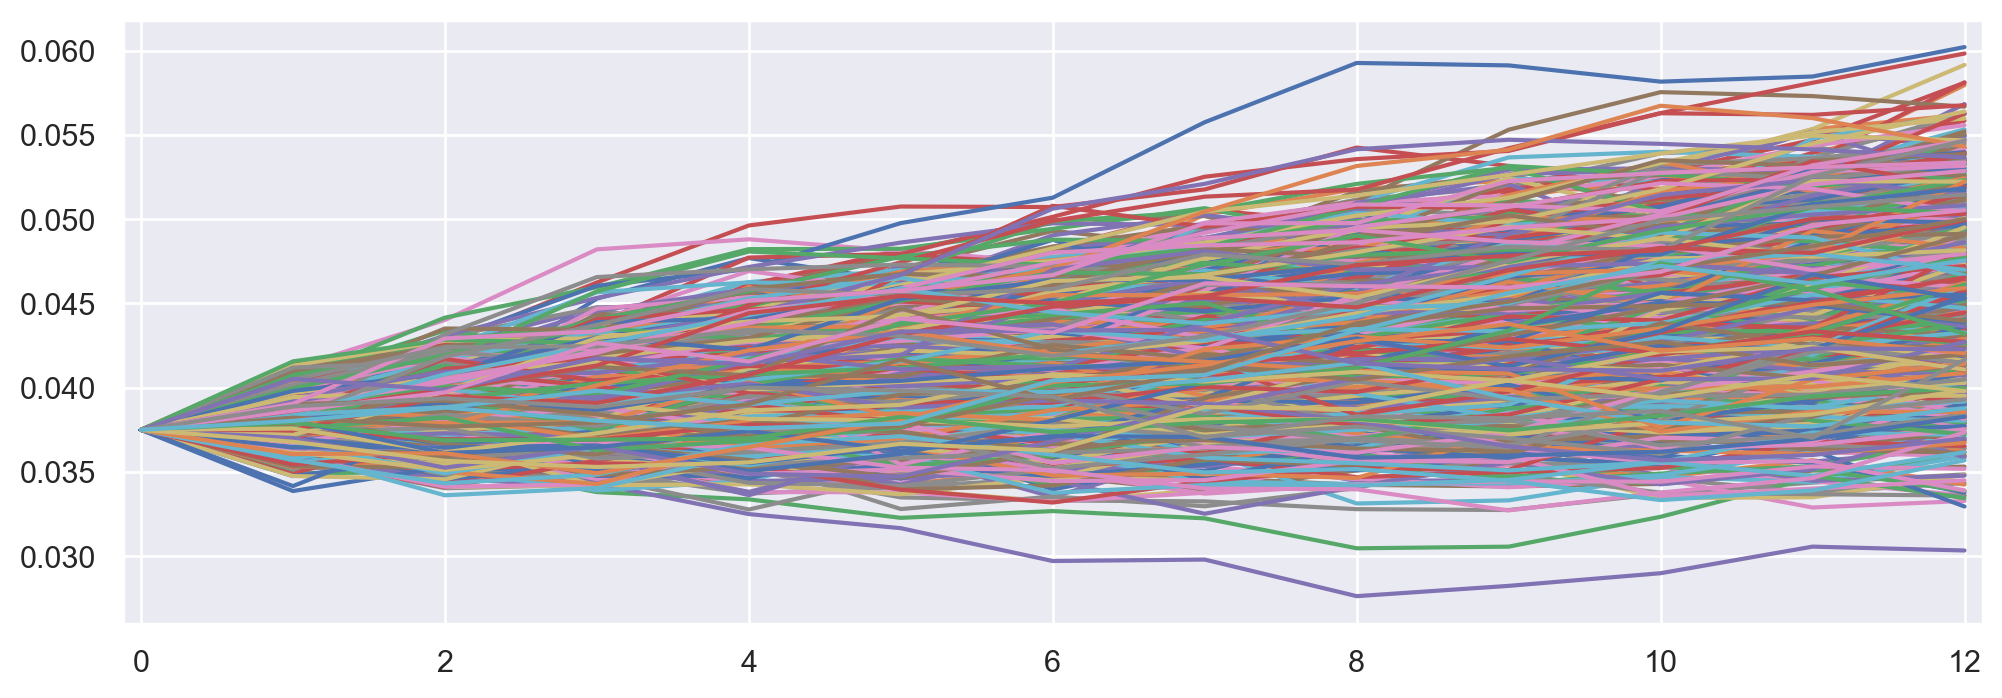

In [15]:
a = -0.194488612925313
b = 0.000358381265440957
sigma = 0.022415895086062
r0 = 0.0375
T = 1
n_steps = 12
dt = T/n_steps
n_paths = 1000

dz = np.random.randn(n_paths,n_steps)
r = r0*np.ones((n_paths,n_steps+1))

for i in range(0,n_steps):
    r[:,i+1] = r[:,i] + a*(b-r[:,i])*dt + sigma*np.sqrt(r[:,i])*dz[:,i]*np.sqrt(dt)
    
fig, ax = plt.subplots(figsize=(12,4), dpi=200)
#for i in range(n_paths):
#    ax.plot(r[i])
ax.plot(np.transpose(r))
ax.margins(x=.01)
plt.show()    

#### – <font color=7E87FC>Ho & Lee</font>:
#### $$dr = a(t)dt + cdW$$
#### It's possible for $r$ to go negative in this model. The $a(t)$ is chosen so that the theoretical curve matches the market yield curve initially – calibration.
#### – <font color=7E87FC>Hull & White</font>:
#### $$dr = (a(t)-b(t)r)dt+c(t)dW$$
#### or 
#### $$dr = (a(t)-b(t)r)dt+c(t)\sqrt{r}dW$$
#### – <font color=7E87FC>Black & Karasinksi</font>:
#### $$d(\ln r) = (a(t)-b(t)\ln r)dt + c(t) dW$$

In [16]:
sigma = 0.1
a = 0.1
timestep = 360
length = 30 # in years
forward_rate = 0.05
day_count = ql.Thirty360(ql.Thirty360.BondBasis)
todays_date = ql.Date(15, 1, 2023)

ql.Settings.instance().evaluationDate = todays_date

spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)

def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

num_paths = 30
time, paths = generate_paths(num_paths, timestep)

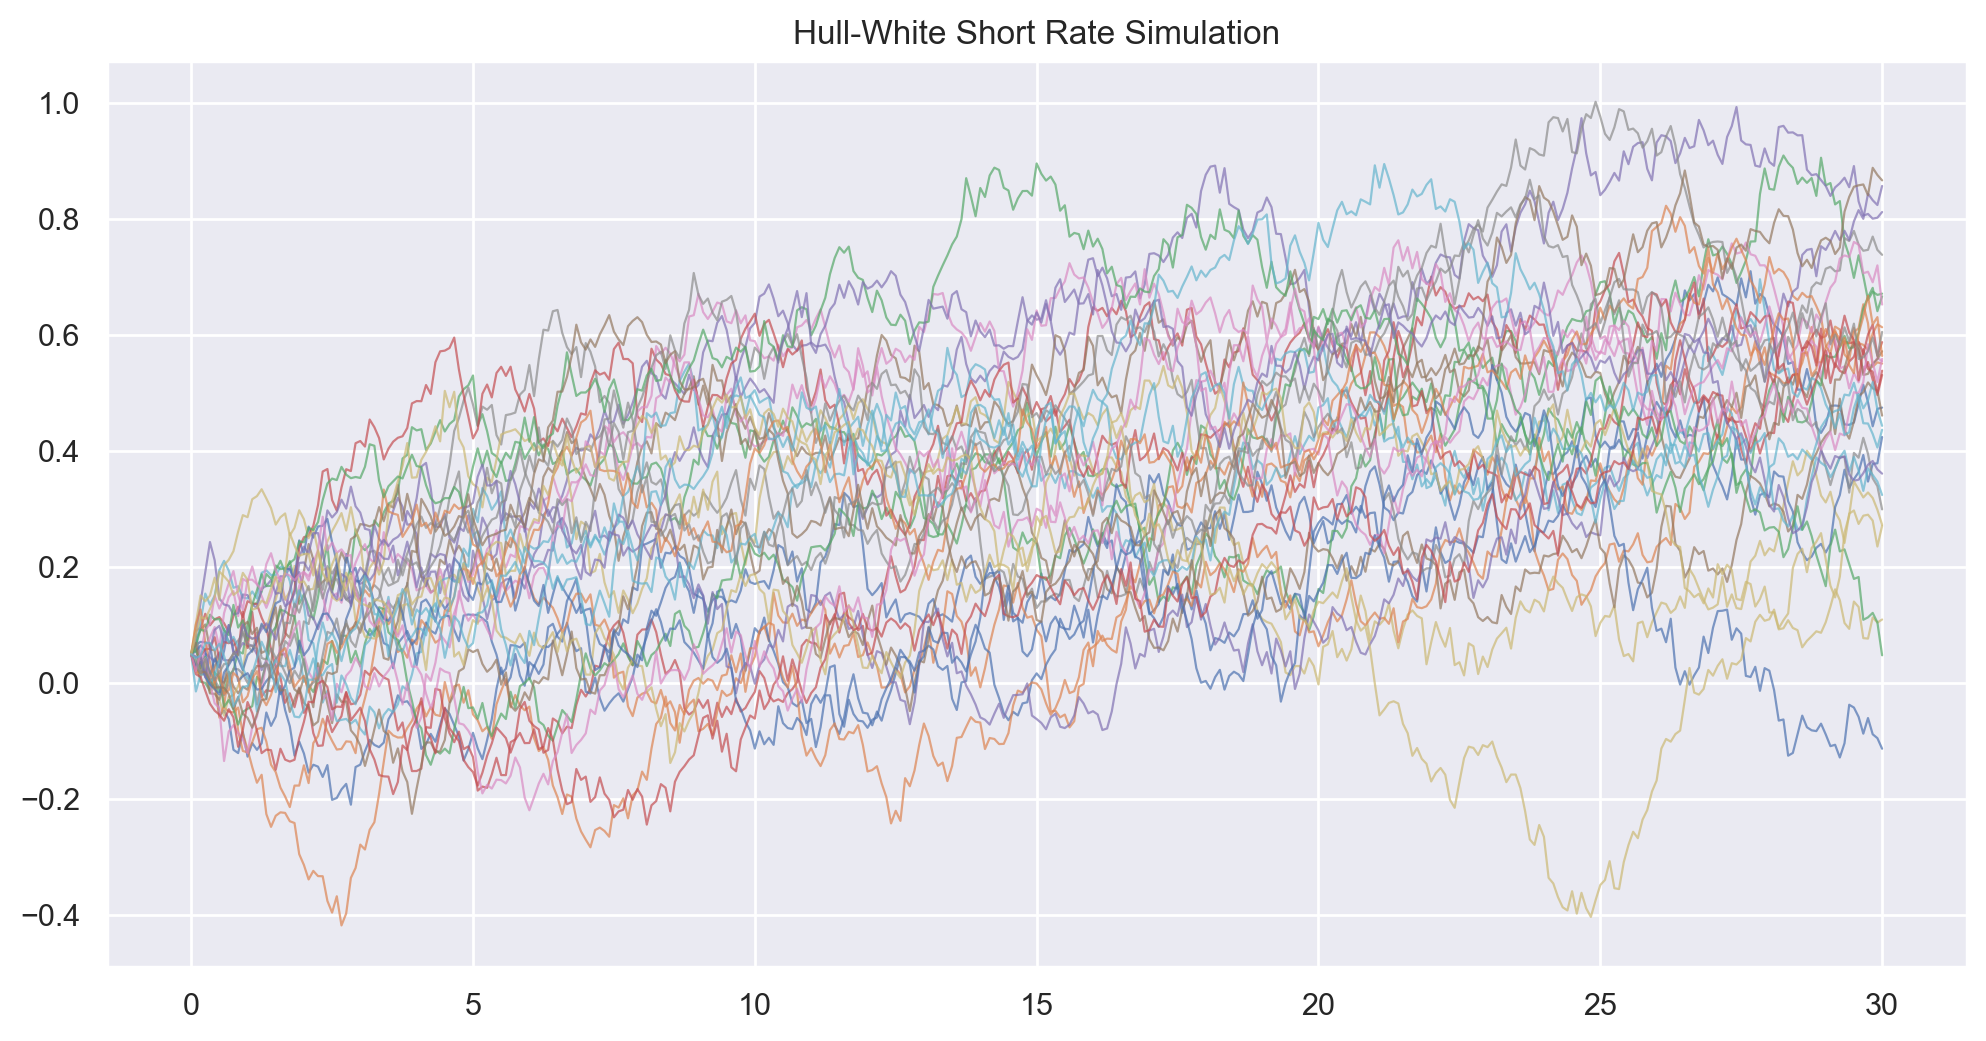

In [17]:
fig, ax = plt.subplots(figsize=(12,6), dpi=200)
for i in range(num_paths):
    ax.plot(time, paths[i, :], lw=.8, alpha=0.7)
ax.set_title("Hull-White Short Rate Simulation")
plt.show()

<hr style="border-style: dotted" />

### <font color=7E87FC>Two-factor models</font>:
#### In these models there are two sources of randomness – much richer structure of theoretical yield curves.
#### – <font color=7E87FC>Brennan & Schwartz</font>:
#### $$dr = (a_1+b_1(l-r))dt + \sigma_1rdW_1$$
#### and the long rate satisfies:
#### $$dl = l(a_2-b_2r+c_2l)dt+\sigma_2ldW_2$$
#### – <font color=7E87FC>Fong & Vasicek</font>:
#### $$dr = a(\bar{r}-r)dt + \sqrt{\xi}dW_1$$ $$d\xi = b(\bar{\xi}-\xi)dt + c\sqrt{\xi}dW_2$$
#### $\xi$ is the square root of the vol. of spot rate.
#### – <font color=7E87FC>Longstaff & Schwartz</font>:
#### $$dx = a(\bar{x}-x)dt + \sqrt{x}dW_1$$ $$dy = b(\bar{y}-y)dt + \sqrt{y}dW_2)$$ $$r = cx+dy$$
#### – <font color=7E87FC>Hull & White</font>:
#### $$dr = (\eta(t)-u-\gamma r)dt+cdW_1$$ $$du = -au\thinspace dt + bdW_2$$
### <font color=7E87FC>SABR</font> (stochastic $\alpha, \beta, \rho$):
#### Model by Hagan, Kumar, Lesniewski & Woodward (2002) for forward rate $F$ and its vol. $\alpha$, both of which are stochastic:
#### $$dF = \alpha F^{\beta}dW_1$$ $$d\alpha = v\alpha dW_2$$
#### The model calibrates well to simple FI-instrumets of specified maturity.
### <font color=7E87FC>Heath, Jarrow & Morton</font>:
#### In the HJM model the evolution of the entire forward curve is modelled:
#### $$dF(t;T) = m(t,T)dt + v(t,T)dW$$
#### $$Z(t;T) = e^{-\int_t^T F(t;s)ds}$$
#### The principal at maturity is here scaled to 1 dollar.  hedging argument shows that the drift of the risk-neutral process for F cannot be specified independently of its volatility and so
#### $$m(t,T) = v(t,T) \int_t^T v(t,s)ds$$
#### That's the same as saying that traded bonds grows at the risk-free spot rate on average in the risk-neutral world.
#### Multi-factor version:
#### $$dF(t,T) = \begin{pmatrix} \sum_{i=1}^N v_i(t,T) \int_t^Tv_i(t,s)ds\end{pmatrix}dt + \sum_{i=1}^Nv_i(t,T)dW_i$$
#### And $dW_i$ are uncorrelated with each other.
<hr>

## <font color=7E87FC>The Greeks</font>:
<hr style="border-style: dotted" />

#### $$N(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{-\frac{\phi^2}{2}}d\phi$$ $$d_1 = \frac{\ln(S/K)+(r-D+\frac{\sigma^2}{2})(T-t)}{\sigma\sqrt{T-t}}$$
#### $$d_2 = \frac{\ln(S/K)+(r-D-\frac{\sigma^2}{2})(T-t)}{\sigma\sqrt{T-t}}$$
### <font color=7E87FC>Call</font>:
#### – Payoff: $\max(S-K,0)$
#### – Value: $Se^{-D(T-t)}N(d_1)-Ke^{-r(T-t)}N(d_2)$
#### – Delta ($\frac{\partial V}{\partial S}$): $e^{-D(T-t)}N(d_1)$
#### – Gamma ($\frac{\partial^2 V}{\partial S^2}$): $\frac{e^{-D(T-t)}N'(d_1)}{\sigma S \sqrt{T-t}}$
#### – Theta ($\frac{\partial V}{\partial t}$): $-\frac{\sigma S e^{-D(T-t)N'(d_1)}}{2\sqrt{T-t}}+DSN(d_1)e^{-D(T-t)}$
#### – Speed ($\frac{\partial^3 V}{\partial S^3}$ – sens. of $\Gamma$ to $S$): $-\frac{e^{-D(T-t)}N'(d_1)}{\sigma^2S^2(T-t)}\times (d_1 + \sigma\sqrt{T-t})$
#### – Charm ($\frac{\partial^2V}{\partial S \partial t}$ – sens. of $\delta$ to $t$): $De^{-D(T-t)}N(d_1)+e^{-D(T-t)}N'(d_1)\times(\frac{d_2}{2(T-t)}-\frac{r-D}{\sigma\sqrt{T-t}})$
#### – Colour ($\frac{\partial^3 V}{\partial S^2 \partial t}$ – sens. of $\Gamma$ to $t$): $\frac{e^{-D(T-t)N'(d_1)}}{\sigma S\sqrt{T-t}}\times (D+\frac{1-d_1d_2}{2(T-t)}-\frac{d_1(r-D)}{\sigma\sqrt{T-t}})$
#### – Vega ($\frac{\partial V}{\partial \sigma}$): $S\sqrt{T-t}e^{-D(T-t)}N'(d_1)$
#### – Rho(r) ($\frac{\partial V}{\partial r}$): $K(T-t)e^{-r(T-t)}N(d_2)$
#### – Rho(D) ($\frac{\partial V}{\partial D}$): $-(T-t)Se^{-D(T-t)}N(d_1)$
#### – Vanna ($\frac{\partial^2 V}{\partial S \partial \sigma}$ – sens. of $\Delta$ to $\sigma$): $-e^{-D(T-t)}N'(d_1)\frac{d_2}{\sigma}$
#### – Volga/Vomma ($\frac{\partial^2 V}{\partial \sigma^2}$ – sens. of vega to $\sigma$): $S\sqrt{T-t}e^{-D(T-t)}N'(d_1)\frac{d_1d_2}{\sigma}$
### <font color=7E87FC>Put</font>:
#### – Payoff: $\max(K-S,0)$
#### – Value: $Ke^{-r(T-t)}N(-d_2)-Se^{-D(T-t)}N(-d_1)$
#### – Delta: $e^{-D(T-t)}(N(d_1)-1)$
#### – Gamma: $\frac{e^{-D(T-t)}N'(-d_1)}{\sigma S\sqrt{T-t}}$
#### – Theta: $-\frac{\sigma S e^{-D(T-t)}N'(-d_1)}{2\sqrt{T-t}} - DSN(-d_1)e^{-D(T-t)}$
#### – Speed: $-\frac{e^{-D(T-t)}N'(d_1)}{\sigma^2 S^2(T-t)}\times (d_1+\sigma\sqrt{T-t})$
#### – Charm: $De^{-D(T-t)}(N(d_1)-1)+e^{-D(T-t)}N'(d_1)\times(\frac{d_2}{2(T-t)}-\frac{r-D}{\sigma\sqrt{T-t}})$
#### – Colour: $\frac{e^{-D(T-t)}N'(d_1)}{\sigma S\sqrt{T-t}}\times(D+\frac{1-d_1d_2}{2(T-t)}-\frac{d_1(r-D)}{\sigma\sqrt{T-t}})$
#### – Vega: $S\sqrt{T-t}e^{-D(T-t)}N'(d_1)$
#### – Rho(r): $-K(T_t)e^{-r(T-t)}N(-d_2)$
#### – Rho(D): $(T-t)Se^{-D(T-t)}N(-d_1)$
#### – Vanna: $-e^{-D(T-t)}N'(d_1)\frac{d_2}{\sigma}$
#### – Volga/Vomma: $S\sqrt{T-t}e^{-D(T-t)}N'(d_1)\frac{d_1d_2}{\sigma}$
### For <font color=7E87FC>binary</font> options see p.457.